# Task 1 - Discrete-time non-linear dynamics

Consider the univariate non-linear map:
$$ x_{t+1} = f(x_t, a, b) = a \cdot x_t + b \cdot tanh(x_t) $$

### 1. Plot the return plot of this map. Do this for the parameter values: <br> I) {a, b} = {1,3}, II) {a,b} = {0.5,−2}, III) {a,b} = {0.5,3} and IV) {a,b} = {1,0}.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# hiding warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# define parameters
a = np.array([1.0, 0.5, 0.5, 1.0])
b = np.array([3.0, -2.0, 3.0, 0.0])

In [7]:
# define non-linear map
def map(x, a, b):
    return a*x + b*np.tanh(x)

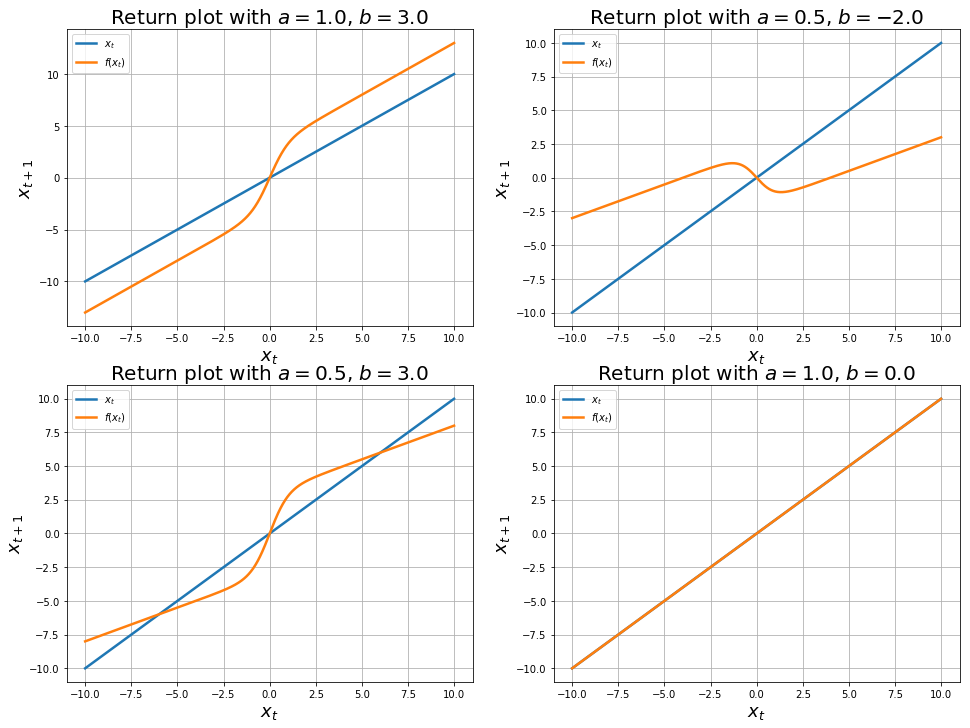

In [8]:
# plot return plot for different parameters
x = np.arange(-10.,10., 1e-2)

# Plot the return plot
fig1 = plt.subplots(figsize=[16,12])

for i in range(a.shape[0]):
    fx = map(x, a[i], b[i])
    
    plt.subplot(2,2,i+1)

    plt.plot(x, x, label=r'$x_t$', linewidth=2.5 )
    plt.plot(x, fx, label=r'$f(x_t)$', linewidth=2.5 )
    
    plt.xlabel(r'$x_{t}$', fontsize = 18)
    plt.ylabel(r'$x_{t+1}$', fontsize = 18)
    plt.grid()
    plt.legend()
    plt.title(r'Return plot with $a={%.1f}$, $b={%.1f}$' %(a[i],b[i]) , fontsize = 20)

plt.show(fig1)

### By inspecting the plot say how many fixed points you expect the system to have and comment on their stability.

In the two plots on the left, the ones with $b=3$, for high positive value of the parameter a (i.e. $a=1$) we can notice that there is only one instable fixed point at x=0, while for low positive value of a (i.e. $a=0.5$) in addition we have other two stable points at $x=\pm6$. <br>
By keeping fixed $a=5$ and by decreasing the parameter b to negative values (i.e. $b=-2$) (plot at top right) the two fixed points disappear. <br>
By using the parameters $(a=1,b=0)$ (plot at bottom right) we can notice that all the points are neutrally stable.

### 2. For all parameter sets specified above, plot the trajectory of the system when starting from the initial conditions x0 = −10, x0 = −0.5, x0 = 0, x0 = 0.5, x0 = 10.

In [9]:
def trajectory(x0, a, b, steps):
        
    # define empty array
    x = np.zeros(steps+1)
    
    # define initial condition
    x[0] = x0
    
    for i in range(steps):
        x[i+1] = map(x[i], a, b)
        
    return x

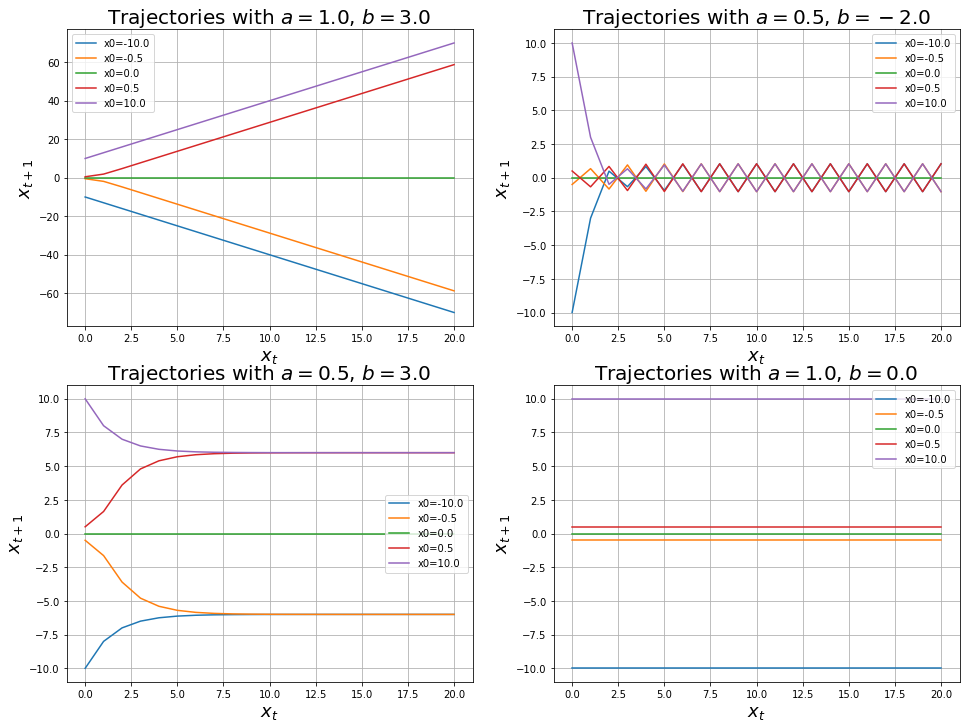

In [10]:
# plot trajectory for different parameters and different starting points
x0 = np.array( [-10., -0.5, 0., 0.5, 10.] )
steps = 20

fig1 = plt.subplots(figsize=[16,12])

for i in range(a.shape[0]):    
    plt.subplot(2,2,i+1)
    
    for j in x0:
        traj = trajectory(j, a[i], b[i], steps)
        plt.plot(np.arange(steps+1), traj, label='x0=%.1f' %(j))
    
    plt.xlabel(r'$x_{t}$', fontsize = 18)
    plt.ylabel(r'$x_{t+1}$', fontsize = 18)
    plt.grid()
    plt.legend()
    plt.title(r'Trajectories with $a={%.1f}$, $b=%.1f$' %(a[i],b[i]) , fontsize = 20)

plt.show(fig1)

### 3. Confirm your intuitions by computing the fixed points (numerically) and their stability (analytically) for the parameter set III

fixed point:
$$ x^{\star} = f(x^{\star}, a, b) = a \cdot x^{\star} + b \cdot tanh(x^{\star}) $$

stability condition:
$$ |f'(x^{\star}, a, b)| = |a + b [ 1 - tanh(x^{\star})^2 ]| < 1 $$

In [11]:
# find fixed points numerically
def fixed_points(x, fx, tolerance=1e-2):
    x_star = np.abs(x - fx)
    
    # find local minima
    index1 = np.r_[True, x_star[1:] < x_star[:-1]] & np.r_[x_star[:-1] < x_star[1:], True]
    
    # find similar values (up to tolerance)
    index2 = x_star <= tolerance
    
    return x[index1 & index2]

In [12]:
# find stability analitycally
def isStable(x, a, b):
    return np.abs(a + b*(1-np.tanh(x)**2) ) < 1.

In [13]:
# print fixed points and relative stability
fx = map(x, a[2], b[2])
x_star = fixed_points(x, fx)

stable = isStable(x_star, a[2], b[2])
fp_stable = x_star[stable]
fp_unstable = x_star[ np.logical_not( stable ) ]

np.set_printoptions(formatter={'float_kind':"{:.3f}".format})
print('Fixed points: ', x_star)
print('Stable: ', stable)
#np.set_printoptions()

Fixed points:  [-6.000 -0.000 6.000]
Stable:  [ True False  True]


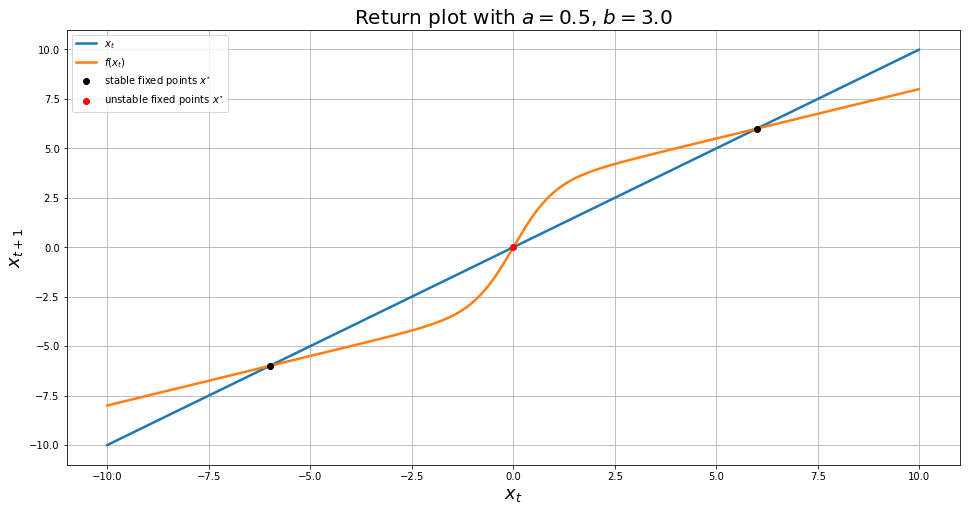

In [14]:
# plot return plot
fig1 = plt.subplots(figsize=[16,8])

plt.plot(x, x, label=r'$x_t$', linewidth=2.5 )
plt.plot(x, fx, label=r'$f(x_t)$', linewidth=2.5 )
plt.plot(fp_stable, fp_stable, 'ok' , label=r'stable fixed points $x^{\star}$', linewidth=3)
plt.plot(fp_unstable, fp_unstable, 'or' , label=r'unstable fixed points $x^{\star}$', linewidth=3)

plt.xlabel(r'$x_{t}$', fontsize = 18)
plt.ylabel(r'$x_{t+1}$', fontsize = 18)
plt.grid()
plt.legend()
plt.title('Return plot with $a={%.1f}$, $b=%.1f$' %(a[2],b[2]), fontsize = 20)
plt.show()

### 4. Plot the bifurcation graph as a function of $a \in [−7, 2]$ (x-axis) for b = 5 in which you display stable fixed points $x^∗$ in the range of $x^∗ \in [−5, 5]$ (y-axis)

In [15]:
def trajectory(x0, a, b, steps):
    n = x0.shape[0]
        
    # define empty array
    x = np.zeros(( steps+1, n ))
    
    # define initial condition
    x[0] = x0
    
    for i in range(steps):
        x[i+1] = map(x[i], a, b)
        
    return x

In [16]:
def findStableObjects(f, a, b, xl=-5., xr=5., N=100, steps=500):
    # generate random initial conditions
    x0 = np.random.uniform(xl,xr,N)
    
    # create trajectories
    x = trajectory(x0, a, b, steps)
    
    # take only last element
    stablePoints = np.ravel( x[(steps-5):,:] )
    
    # discard repetitive elements
    stablePoints = np.unique(stablePoints)
    
    # discard similar element up to tolerance
    tol = 0.01
    stablePoints = stablePoints[~(np.triu(np.abs(stablePoints[:,None] - stablePoints) <= tol,1)).any(0)]
    
    return stablePoints

In [17]:
a = np.arange(-7., 2., 0.01)
b = 5.

stableObjects = []

for i in a:
    stableObjects.append( findStableObjects(map, i, b ) )

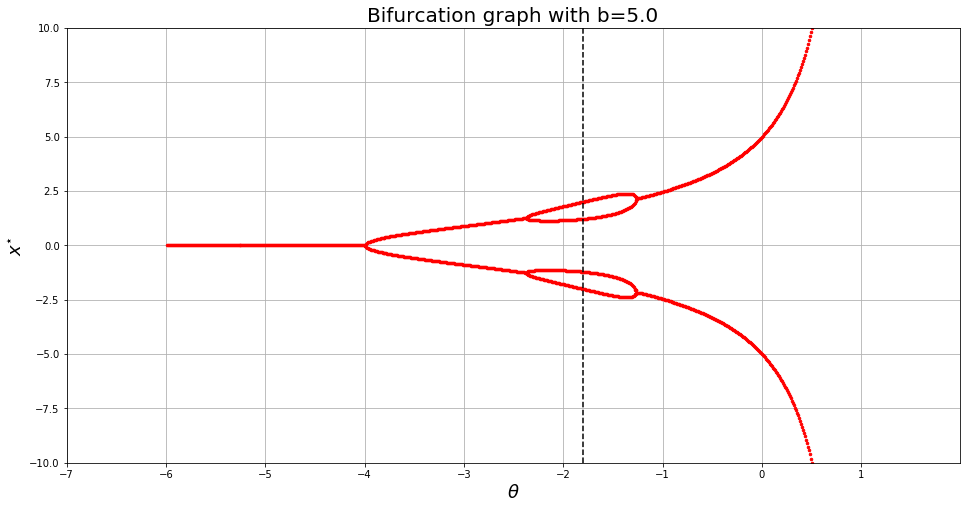

In [18]:
# plot bifurcation graph
fig1 = plt.subplots(figsize=[16,8])

for i in range(len(a)):
    plt.plot(np.zeros(stableObjects[i].shape)+a[i], stableObjects[i], '.r', markersize=5)
    
plt.axvline( x=-1.8, c='k', ls='--' )
    
plt.xlim([a[0], a[-1]])
plt.ylim([-10.,10.])
plt.xlabel(r'$\theta$', fontsize = 18)
plt.ylabel(r'$x^{\star}$', fontsize = 18)
plt.grid()
plt.title('Bifurcation graph with b=%.1f' % b, fontsize = 20)
plt.show()

### How would you interpret the bifurcation graph at a = −1.8?

In [ ]:
# compute cobweb for fixed initial point
def cobweb(x0, a, b, steps = 10):
    p = np.zeros(( 2, steps ))
    
    p[:,0] = [x0, x0]
    p[:,1] = [x0, map(x0, a, b) ]
    
    for i in range(2, steps, 2):
        p[:,i] = [ p[1,i-1], p[1,i-1] ]
        p[:,i+1] = [ p[0,i], map(p[0,i], a, b) ]
    
    return p

In [ ]:
# print fixed points and relative stability
x = np.arange(-5.,5., 1e-2)

a = -1.8

fx = map(x, a, b)
x_star = fixed_points(x, fx)

stable = isStable(x_star, a, b)
fp_stable = x_star[stable]
fp_unstable = x_star[ np.logical_not( stable ) ]

np.set_printoptions(formatter={'float_kind':"{:.3f}".format})
print('Fixed points: ', x_star)
print('Stable: ', stable)

In [ ]:
# Plot the return plot
x = np.arange(-5.,5., 1e-2)

x0 = [-3, -1, 1, 3]

a = -1.8

fig1 = plt.figure(figsize=[16,6])

fx = map(x, a, b)
plt.plot(x, x, label=r'$x_t$', linewidth=2.5 )
plt.plot(x, fx, label=r'$f(x_t)$', linewidth=2.5 )
plt.plot(fp_stable, fp_stable, 'ok' , label=r'stable fixed points $x^{\star}$', linewidth=3)
plt.plot(fp_unstable, fp_unstable, 'or' , label=r'unstable fixed points $x^{\star}$', linewidth=3)

for i in x0:
    line = cobweb(i, a, b)
    plt.plot(line[0], line[1], '--r')
    plt.plot(line[0,0], line[1,0], 'ob')
    
plt.xlabel(r'$x_{t}$', fontsize = 18)
plt.ylabel(r'$x_{t+1}$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(r'Return plot with $a={%.1f}$, $b={%.1f}$' %(a,b) , fontsize = 20)

plt.show(fig1)

As we can notice from the plots above, for $a=1.8$ also the two fixed points different from zero become unstable, but at the same time there is the emerging of four other periodically stable objects.

# Task 2 - Training an RNN in PyTorch

Consider a recurrent neural network with N neurons:
$$ x_t = \Phi(A x_{t-1} + I_t) $$
$$ \Phi(y) = tanh(y) $$

You are given the following mapping from inputs to outputs:
$$ I_3 = (1,0,0,...)^T  \rightarrow x_7 = (...,1,0,...)^T $$
$$ I_3 = (0,1,0,...)^T  \rightarrow x_7 = (...,0,1,...)^T $$

### For N = 5, examine the convergence of the error function and the performance of the network after apparent convergence for different learning rates from the range $\alpha \in [10^{-5},1] $ 

In [ ]:
from working_memory_RNN import RNN

In [ ]:
alpha = [1e-5, 1e-3, 1e-1, 1.0]

for i in alpha:
    RNN(alpha = i)

As we can notice, for the two smaller values of $\alpha$ the loss function doesn't converge to zero and the network isn't able to reproduce the exact output values. This is probably because the system falls into a local minima and it's not able to move out from it. On the other hand with the others higher values of $\alpha$ the network correctly reproduces the outputs.

### Comparing that to training in networks with N = 10 units.

In [ ]:
alpha = [1e-5, 1e-3, 1e-1, 1.0]

for i in alpha:
    RNN( N = 10, alpha = i )

By duplicating the total number of neurons, we observe that the fenomenology is the same.

### Change the activation function to the rectified linear function (ReLU) and do a comparison.

In [ ]:
alpha = [1e-5, 1e-3, 1e-1, 1.0]

for i in alpha:
    RNN(alpha = i, nonlinearity = 'relu')

for i in alpha:
    RNN( N = 10, alpha = i, nonlinearity = 'relu')

By changing the activation function to ReLU (Rectified Linear Unit), we can observe that the network is able to reach convergence and correctly reproduce the output only with $\alpha=10^{-1}$ with both N=5,10 total number of neurons: so we can notice that the performance of a RNN are strictly dependent on the choice of the activation function.